In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%config IPCompleter.greedy=True

### Загрузка данных

In [ ]:
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Задача 1

Постройте гистограмму распределения объема продаж всех игр в Японии

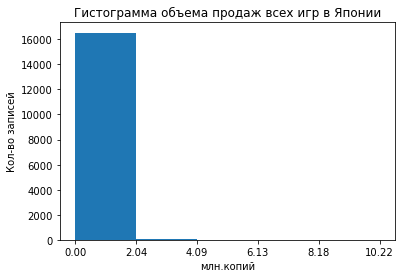

In [ ]:
plt.hist(df['JP_Sales'], bins=5);

lis_range = list(np.arange(df['JP_Sales'].min(), df['JP_Sales'].max() + 1, df['JP_Sales'].max()/5))
plt.xticks(lis_range)

plt.title('Гистограмма объема продаж всех игр в Японии')
plt.xlabel('млн.копий')
plt.ylabel('Кол-во записей');

### Задача 2

Постройте столбчатую диаграмму (barchart), показывающую сравнение общемирового объема продаж игры "Grand Theft Auto V" на разных платформах

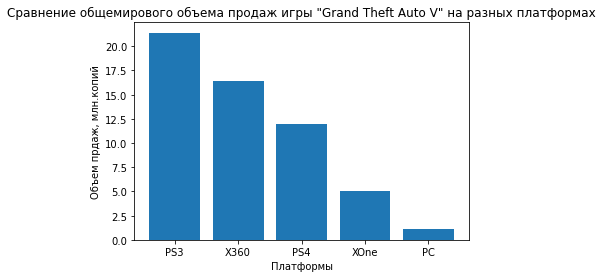

In [ ]:
plt.bar(df[df['Name'] == 'Grand Theft Auto V']['Platform'], df[df['Name'] == 'Grand Theft Auto V']['Global_Sales'])

plt.title('Сравнение общемирового объема продаж игры "Grand Theft Auto V" на разных платформах')
plt.xlabel('Платформы')
plt.ylabel('Объем прдаж, млн.копий');

### Задача 3

Постройте линейный график динамики суммарных общемировых продаж всех игр по годам

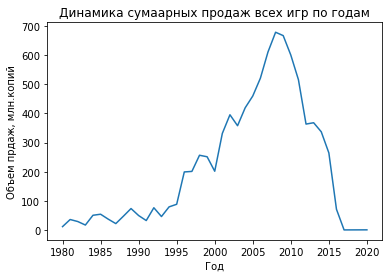

In [ ]:
plt.plot(df['Global_Sales'].groupby(df['Year']).agg('sum'))

plt.title('Динамика сумаарных продаж всех игр по годам')
plt.xlabel('Год')
plt.ylabel('Объем прдаж, млн.копий');

### Задача 4

Постройте точечную диаграмму, показывающую существование зависимости продаж во всем мире от продаж в Северной Америке

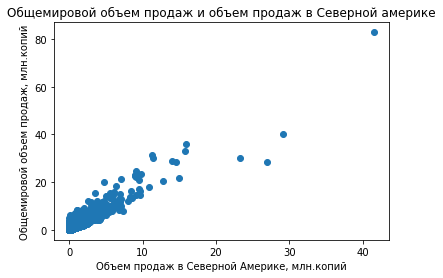

In [ ]:
plt.scatter(df['NA_Sales'], df['Global_Sales'])

plt.title('Общемировой объем продаж и объем продаж в Северной америке')
plt.xlabel('Объем продаж в Северной Америке, млн.копий')
plt.ylabel('Общемировой объем продаж, млн.копий');

### Задача 5

Постройте круговую диаграмму процентного соотношения продаж игры "Super Mario Bros." на разных платформах во всем мире. Подпишите доли графика с точностью 1 знак после запятой.

Text(0.5, 1.0, 'Сравнение объемов продаж игры Super Mario Bros. на разных платформах')

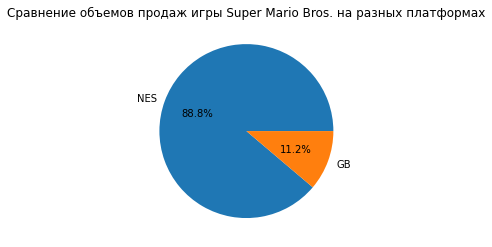

In [ ]:
df_Mario = df[df['Name'] == 'Super Mario Bros.']
plt.pie(df_Mario['Global_Sales'],labels = df_Mario['Platform'], autopct='%1.1f%%')

plt.title('Сравнение объемов продаж игры Super Mario Bros. на разных платформах')

### Задача 6

Определите 5 издателей, имеющих наибольшие суммарные продажи во всем мире в 2013 году и проиллюстрируйте величину их продаж на столбчатой гистограмме

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

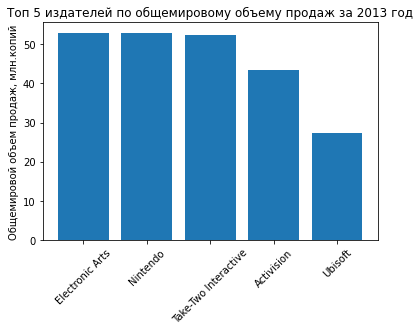

In [ ]:
df_top_five = df[df['Year'] == 2013]['Global_Sales'].groupby(df['Publisher']).agg('sum').sort_values(ascending=False).head(5)
plt.bar(df_top_five.index, df_top_five)

plt.title('Топ 5 издателей по общемировому объему продаж за 2013 год')
plt.ylabel('Общемировой объем продаж, млн.копий');
plt.xticks(rotation = 45)

### Задача 7

Постройте гистограмму распределения величины общемировых продаж игр, выпущенных не издателем Nintendo, в период с 2000 по 2015 год включительно. Гистограмма для большей точности должна содержать 20 столбцов, отсечки на оси X должны соответствовать границам столбцов.

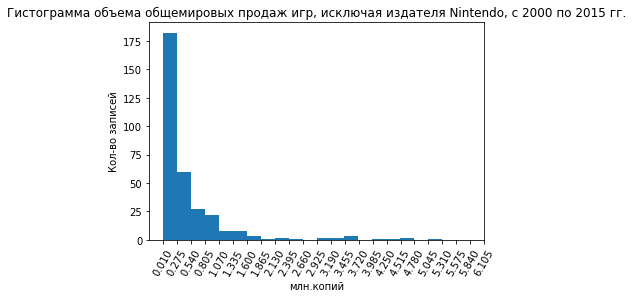

In [ ]:
ser_not_nintendo = df[(df['Publisher'] != 'Nintendo') & (df['Year'] >= 2000) & (df['Year'] <= 2000)]['Global_Sales']

plt.hist(ser_not_nintendo, bins = 20)

lis_range = list(np.arange(ser_not_nintendo.min(), ser_not_nintendo.max() + 1, ser_not_nintendo.max()/20))
plt.xticks(lis_range, rotation = 60)

plt.title('Гистограмма объема общемировых продаж игр, исключая издателя Nintendo, с 2000 по 2015 гг.')
plt.xlabel('млн.копий')
plt.ylabel('Кол-во записей');

### Задача 8

Постройте линейный график динамики суммарных мировых продаж игр жанра "Action" по годам

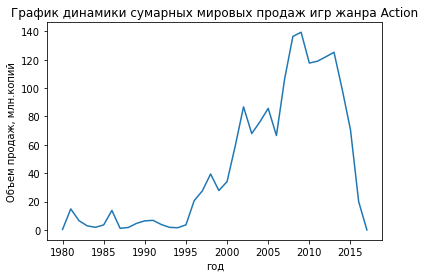

In [ ]:
df_action = df[df['Genre'] == 'Action'][['Year', 'Global_Sales']].groupby('Year').agg('sum')
df_action

plt.title('График динамики сумарных мировых продаж игр жанра Action')
plt.xlabel('год')
plt.ylabel('Объем продаж, млн.копий')
plt.plot(df_action);

### Задача 9

С помощью столбчатой диаграммы проиллюстрируйте объем продаж всех игр издателя "Microsoft Game Studios" в Северной Америке за все время в зависимости от жанра. Столбцы расположите по убыванию.

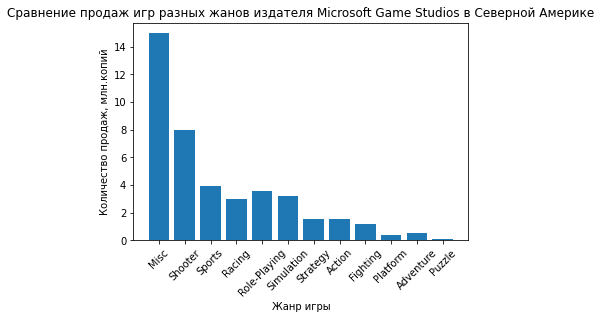

In [ ]:
df_mgs = df[df['Publisher'] == 'Microsoft Game Studios'][['Genre', 'NA_Sales']]

plt.bar(df_mgs['Genre'], df_mgs['NA_Sales'])

plt.xticks(rotation = 45)
plt.title('Сравнение продаж игр разных жанов издателя Microsoft Game Studios в Северной Америке')
plt.xlabel('Жанр игры')
plt.ylabel('Количество продаж, млн.копий');

## Дополнительные (необязательные) задачи

### Задача 10

Одной из основных задач при анализе данных является проверка данных на корректность и отсутствие ошибок. В датасете "vgsales" одним из потенциальных источников ошибок является столбец с общемировыми продажами. По идее, значение общемировых продаж какой-либо игры должно равняться сумме продаж в Северной Америке, Европе, Японии и остальных странах, в противном случае мы получим ошибку в данных, которая может негативно повлиять на весь дальнейший процесс анализа.

Причин возникновения такой ошибки может быть несколько. Давайте рассмотрим следующие причины:
1. Ошибка округления. В целом, такая ошибка достаточно часто встречается при переводе величин из одних единиц в другие (например, из тысяч копий в миллионы копий).
1. Ошибка вычислений. Такая ситуация требует более серьезного исследования, поскольку она может привести к недостоверным результатам анализа данных.

Будем считать, что в записи имеется ошибка суммирования, если сумма продаж какой-либо игры в Северной Америке, Европе, Японии и остальных странах отличается от общемировых продаж более, чем на 0.01 млн копий.

С помощью круговой диаграммы проиллюстрируйте процент записей в датасете, имеющих такую ошибку суммирования продаж.

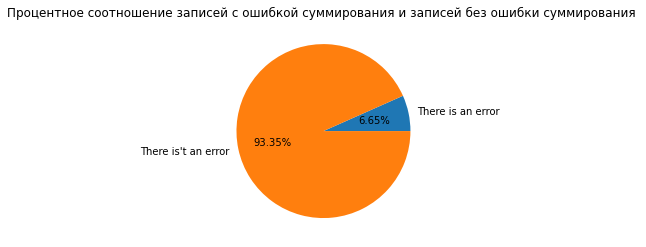

In [ ]:
df_error = pd.DataFrame({'IsError' : ['There is an error', 'There is\'t an error'], 'Count_entries' : [0, 0]})
df_error.loc[0, 'Count_entries'] = df[(df['Global_Sales'] - df['NA_Sales'] - df['EU_Sales'] - \
                                       df['JP_Sales'] - df['Other_Sales']) > 0.01]['Rank'].count()
df_error.loc[1, 'Count_entries'] = df['Rank'].count() - df_error.loc[0, 'Count_entries']


plt.pie(df_error['Count_entries'], labels = df_error['IsError'], autopct='%1.2f%%')

plt.title('Процентное соотношение записей с ошибкой суммирования и записей без ошибки суммирования ');

In [1]:
data1980 = df[df['Year'] == 1980]['Salary']
data1990 = df[df['Year'] == 1990]['Salary']
data2000 = df[df['Year'] == 2000]['Salary']

fid, ax = plt.subplots(figsize = (12,8))

_, bins1, _ = ax.hist(data1980, alpha = 0.3, bins = 15, label=1980)
ax.hist(data1990, bins = bins1, alpha = 0.3, label=1990)
ax.hist(data2000, bins = bins1, alpha = 0.3, label=2000)
ax.set_xticks(bins1)
ax.legend()

plt.show()

NameError: ignored